In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns

In [30]:
# source data https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data
df=pd.read_csv("telecom_churn.csv")

# EDA

In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values for all columns.
However, TotalCharges is reported as object, which is wrong. Let's analyse


In [6]:
print(df['TotalCharges'].str.contains('[a-zA-Z]').sum())
print(df['TotalCharges'].isnull().sum())
print(df['TotalCharges'].isna().sum())
print(df['TotalCharges'].unique())
#pd.to_numeric(df['TotalCharges'], errors='coerce')

0
0
0
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [7]:
df[df['TotalCharges'].apply(pd.to_numeric, errors='coerce').isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,0,No


There are 11 rows with unusual values in TotalCharges column that can't identified, but the values are converted to NaN by to_numeric function. 
Let's convert the values and then drop 11 records completely.

In [31]:
df_raw=df.copy()
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.shape

(7032, 23)

                                             | | [  0%]   00:00 -> (


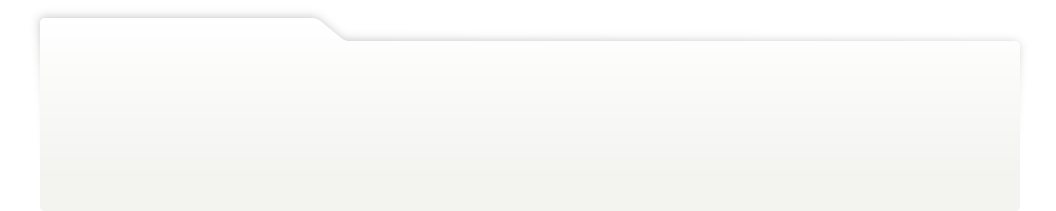
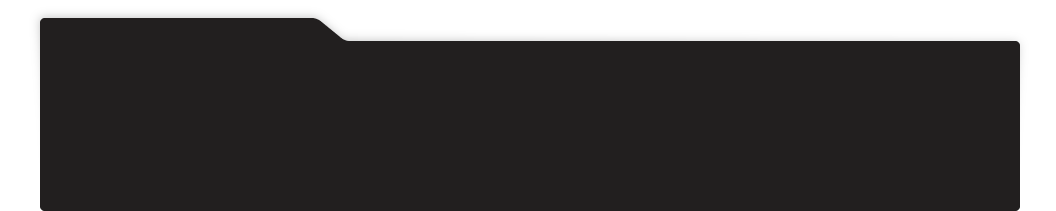
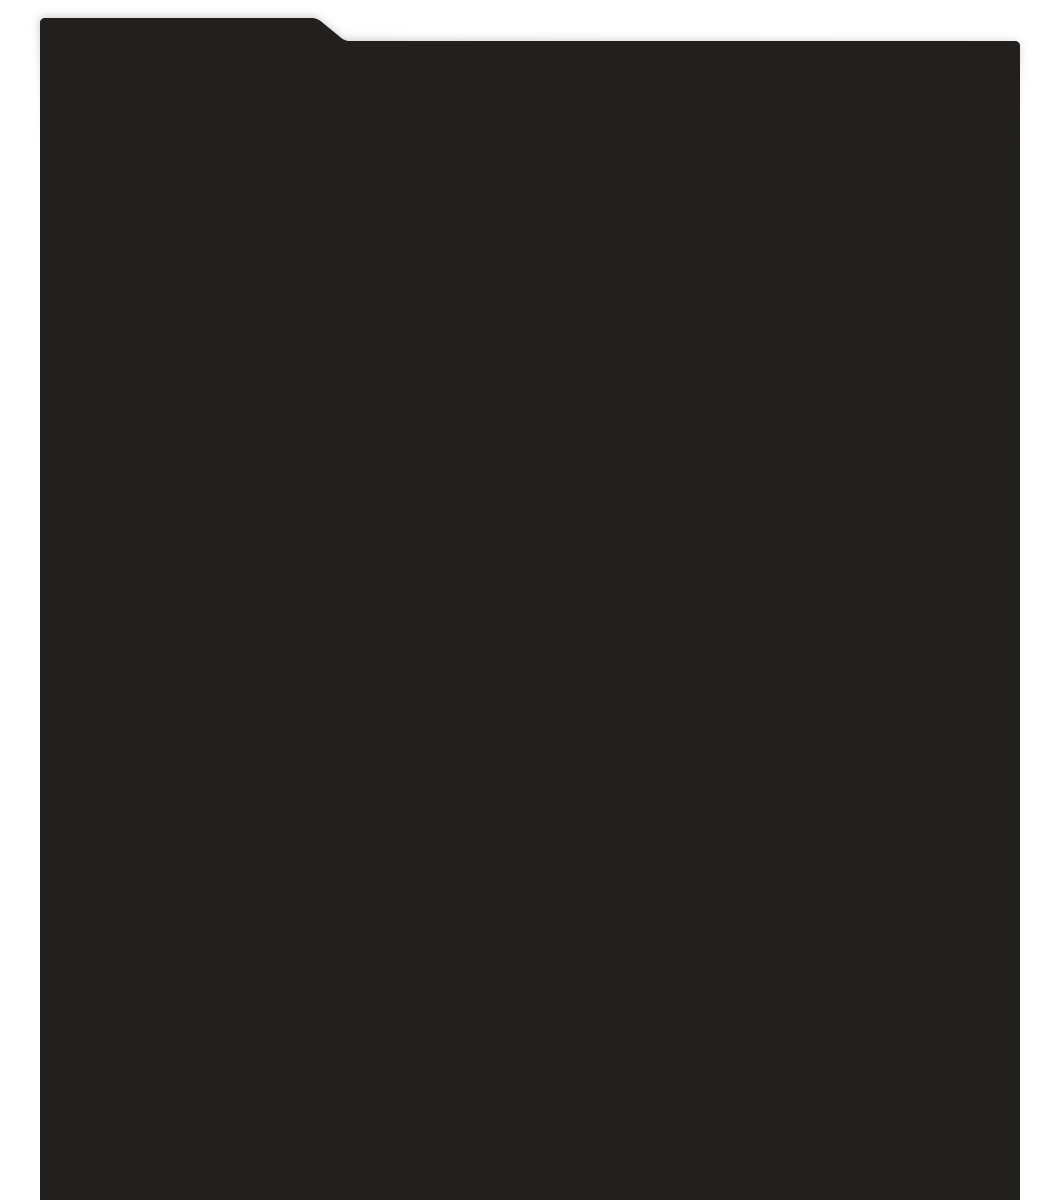
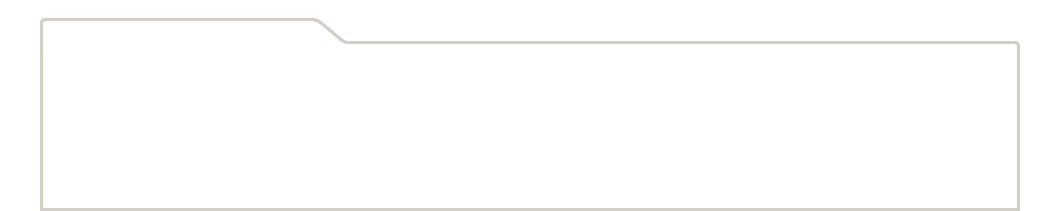
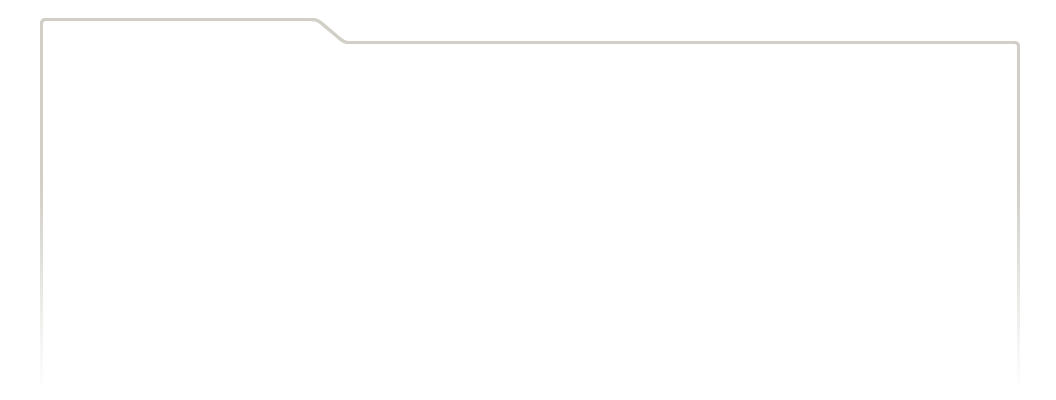
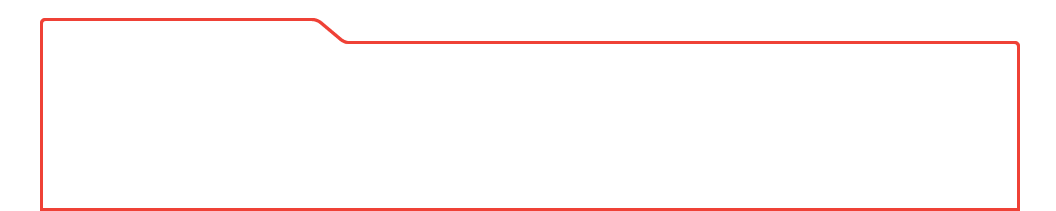
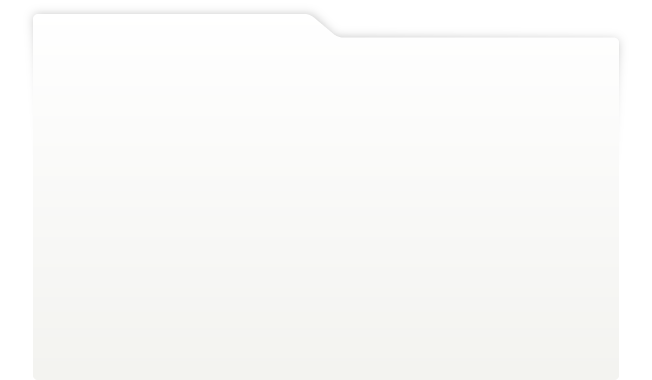
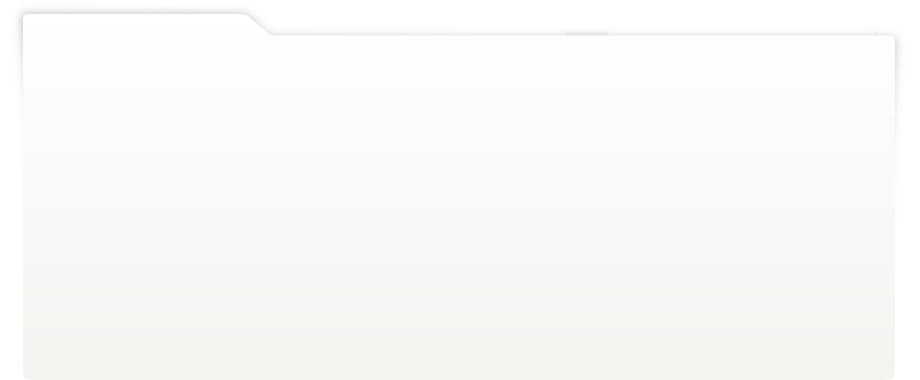
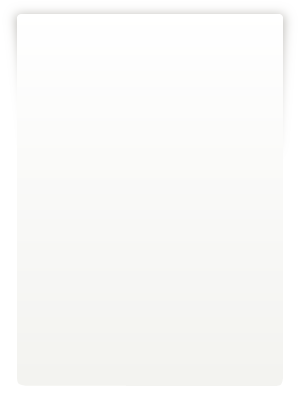
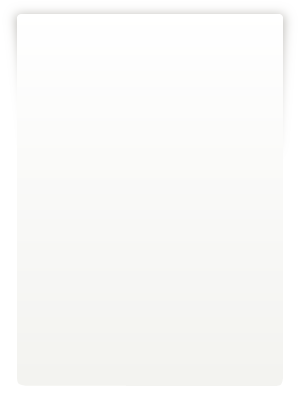
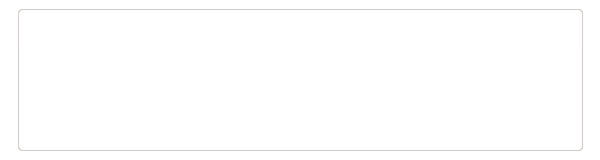
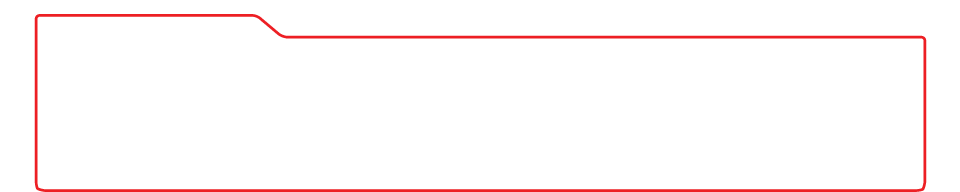
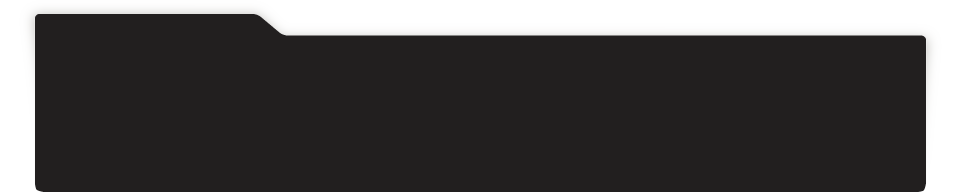
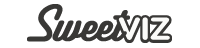
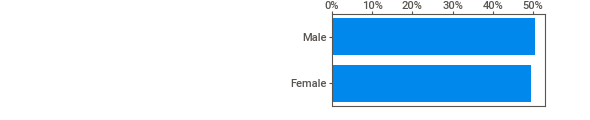
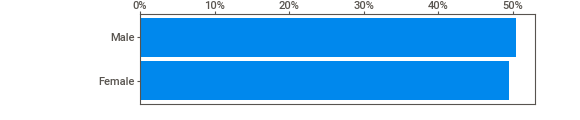
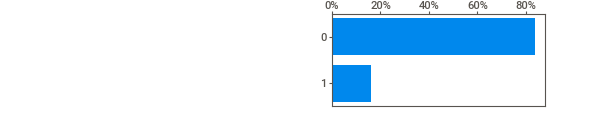
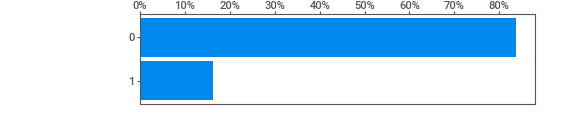
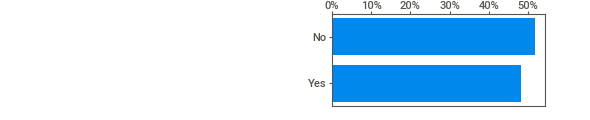
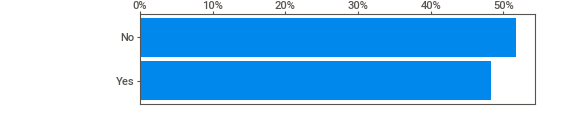
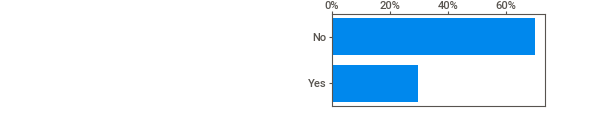
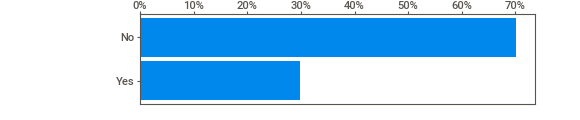
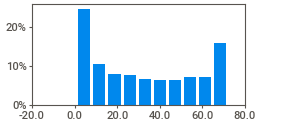
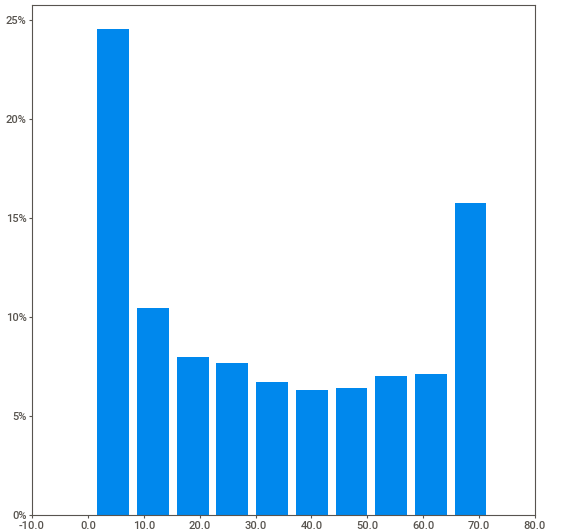
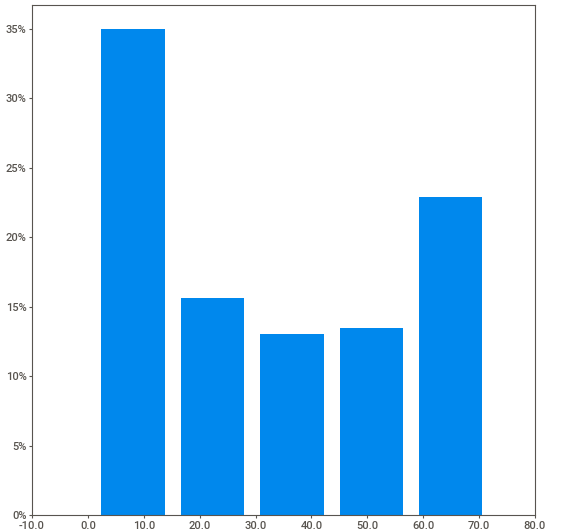
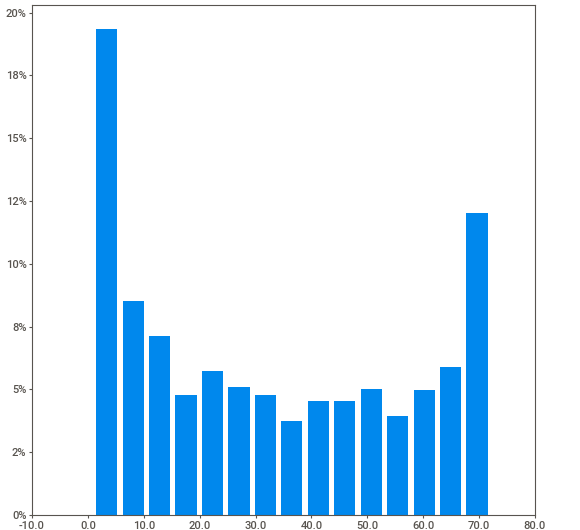
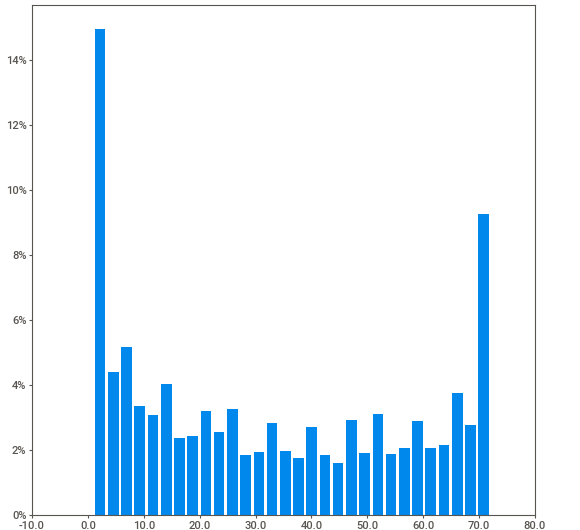
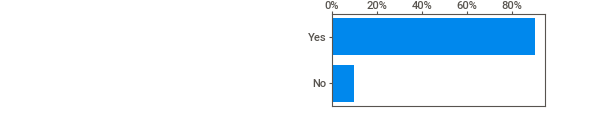
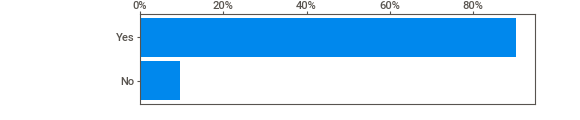
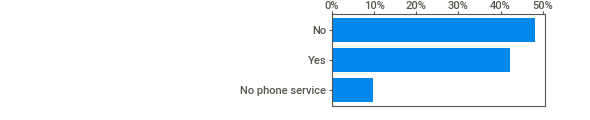
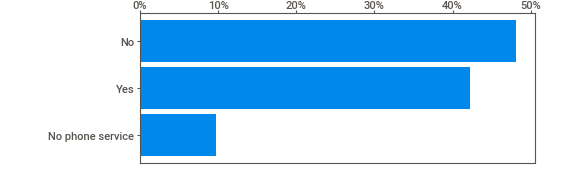
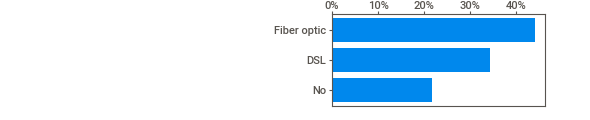
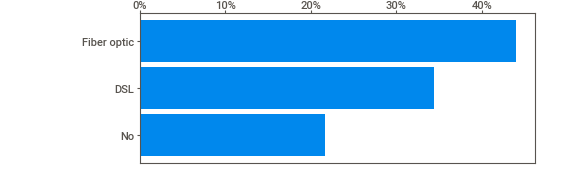
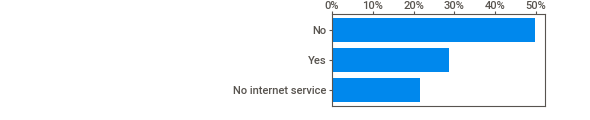
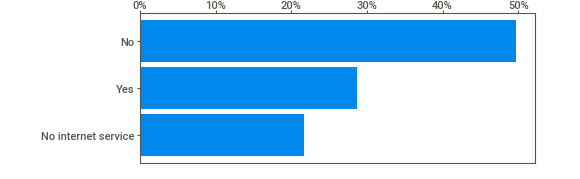
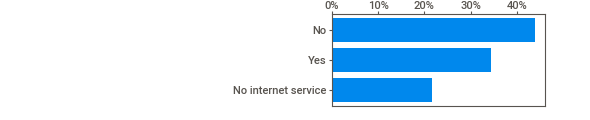
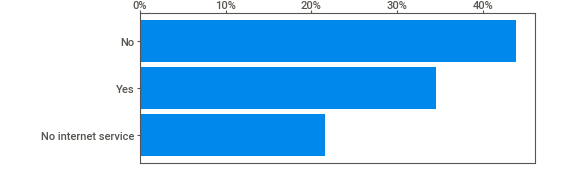
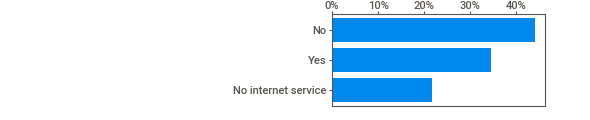
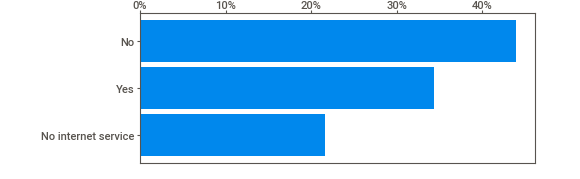
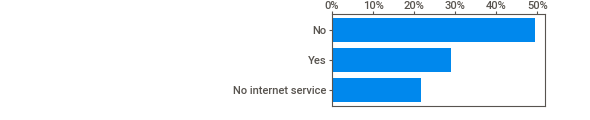
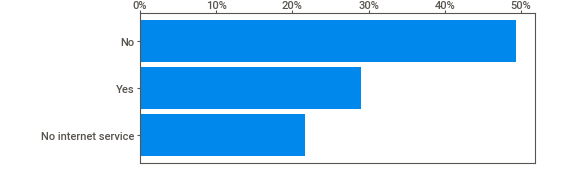
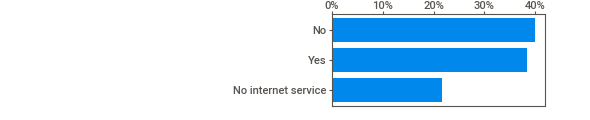
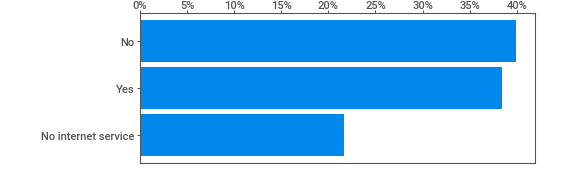
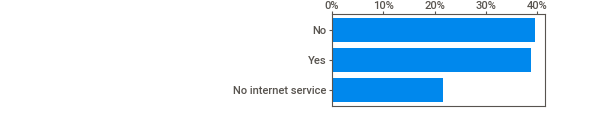
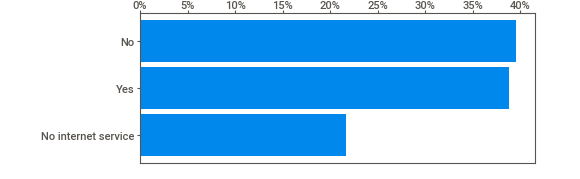
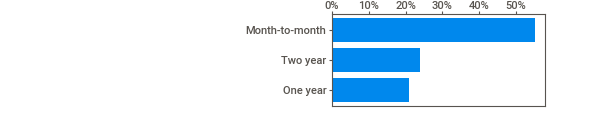
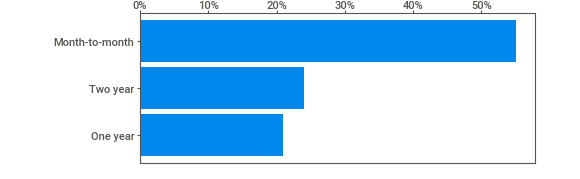
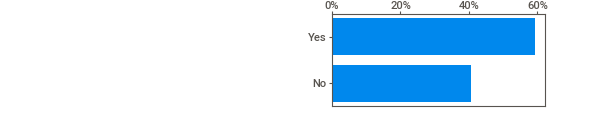
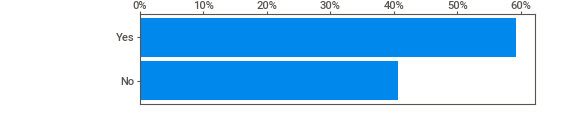
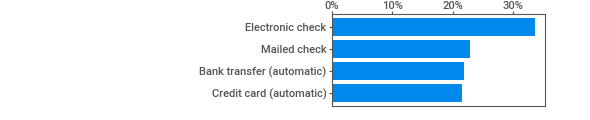
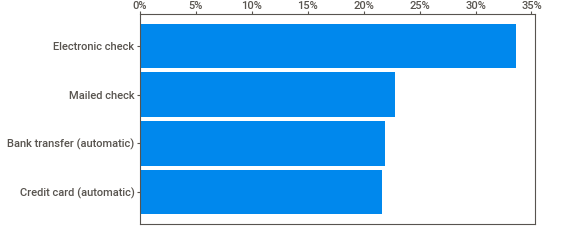
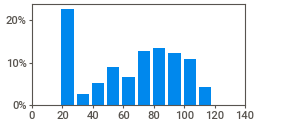
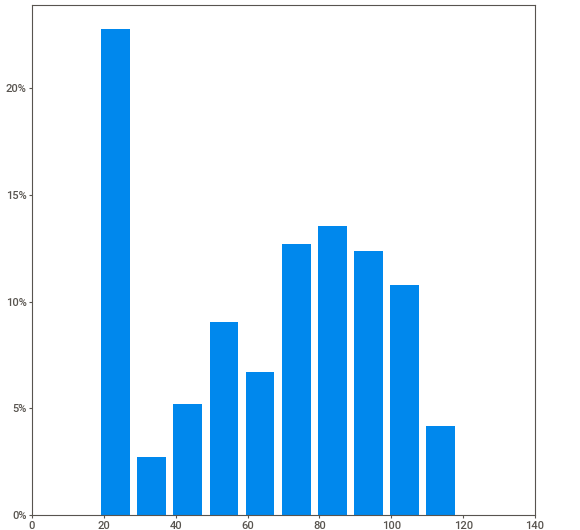
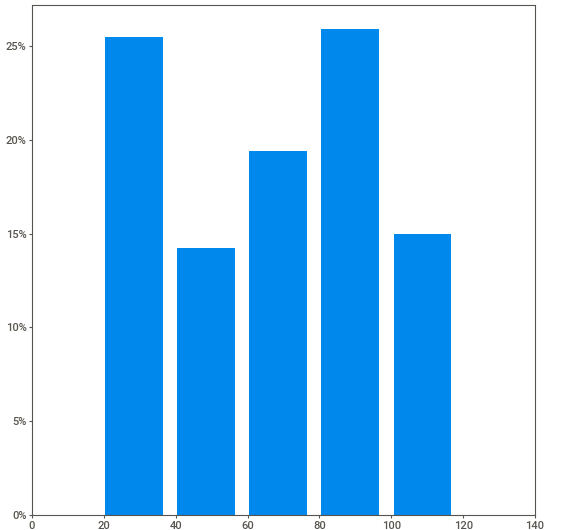
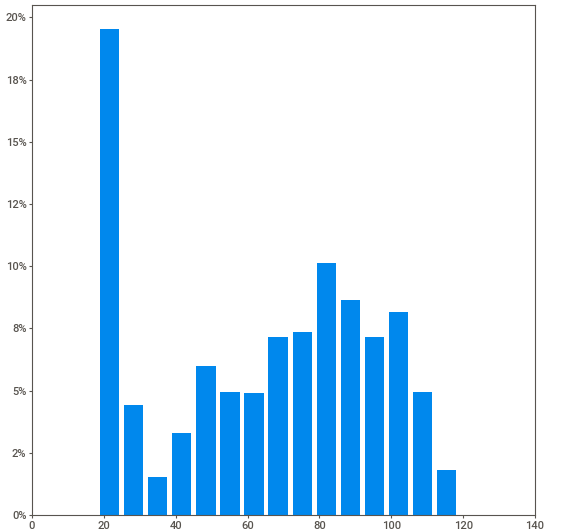
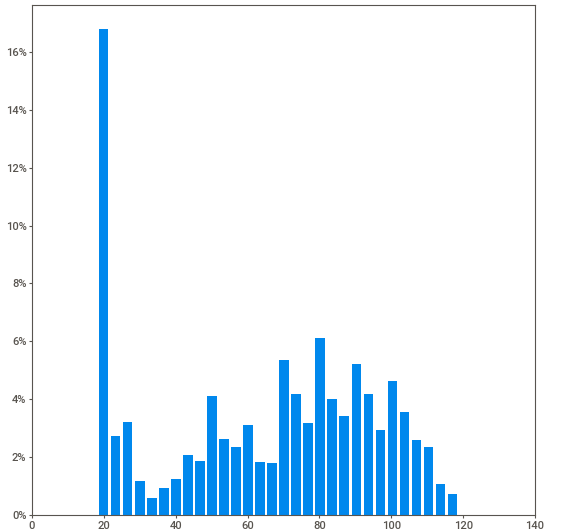
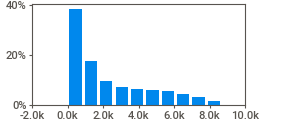
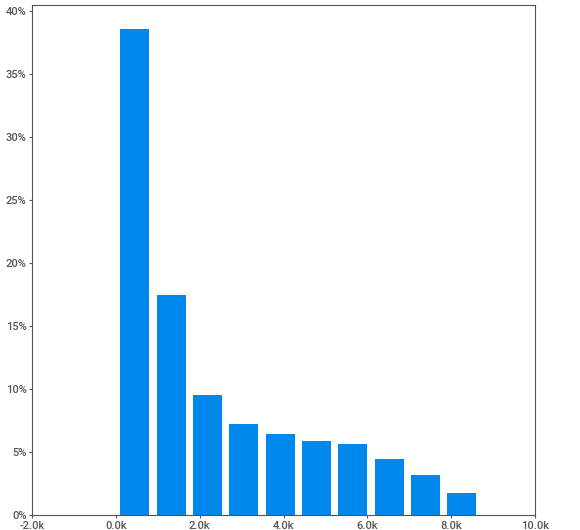
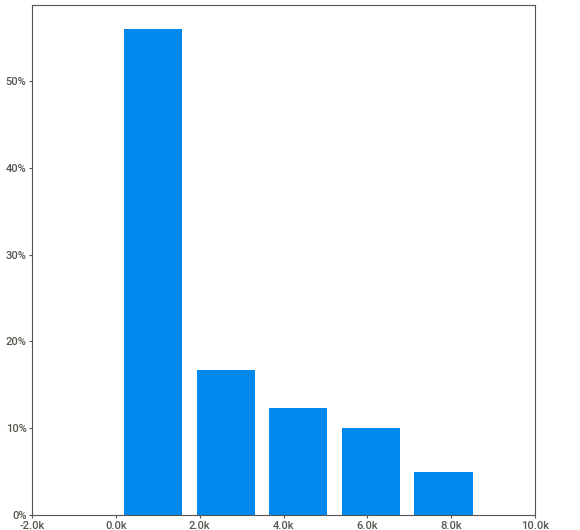
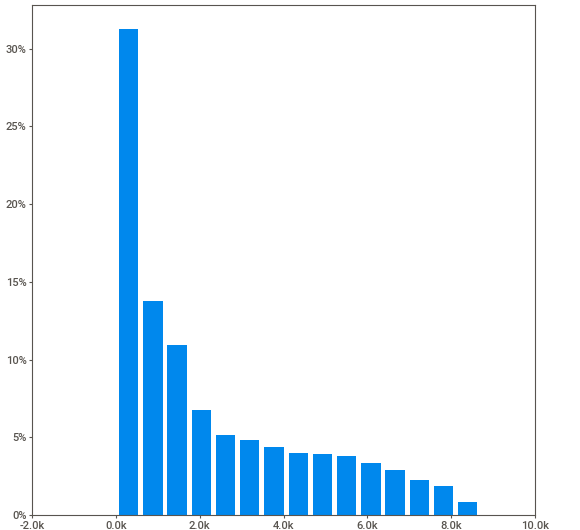
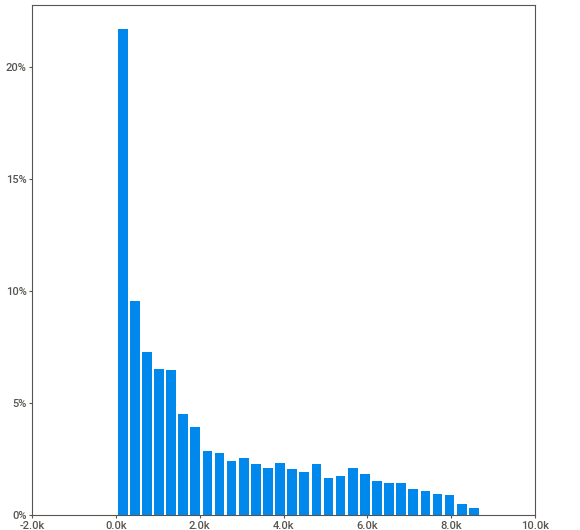
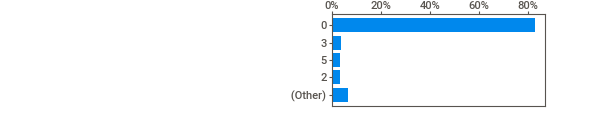
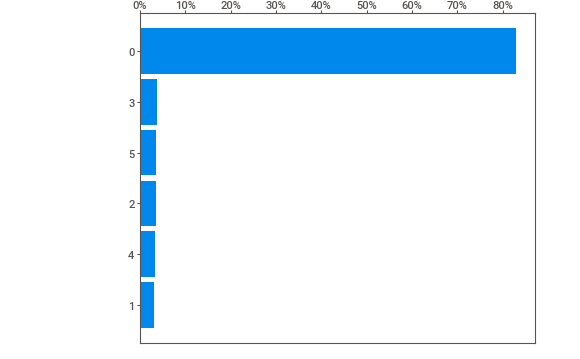
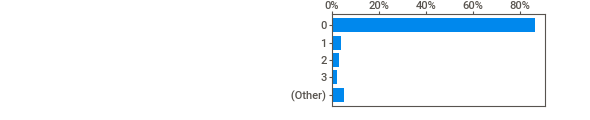
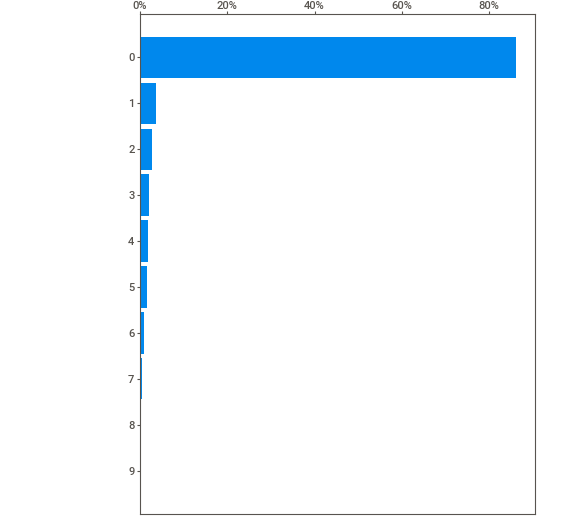
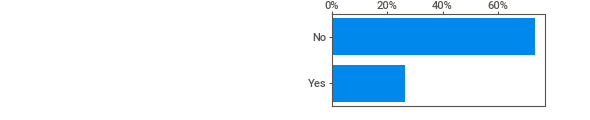
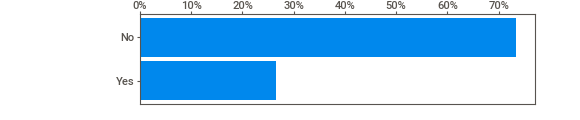
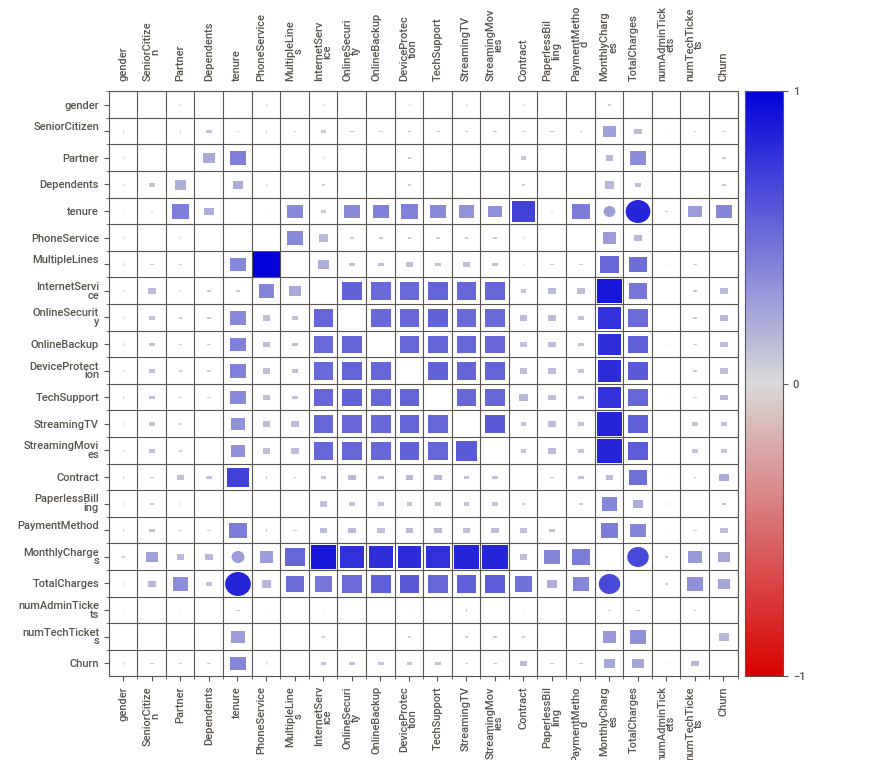
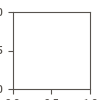

In [9]:
report = sv.analyze(df)

report.show_notebook()


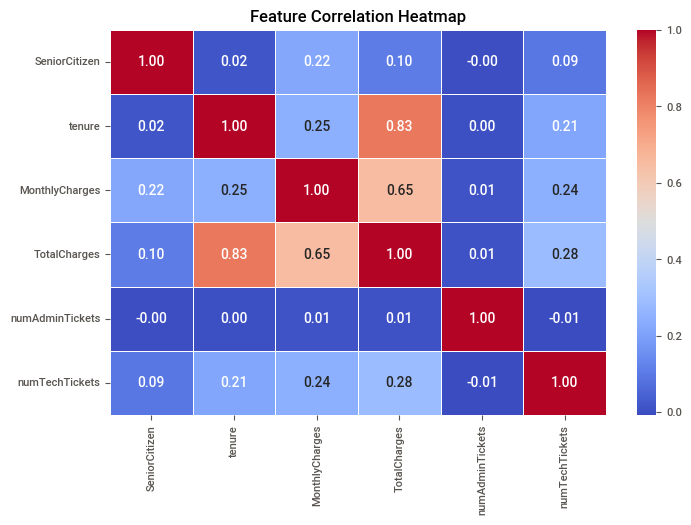

In [10]:

correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap")
plt.show()

No obvious correlations between numeric columns, let's check again after the label encoding

# Data Preparation

There are string  columns, so I have to encode categorical columns (e.g., Gender, InternetService)

In [42]:
# dropping customerID
df=df.drop('customerID',axis=1)

# swapping 'Not applicable' (e.g., 'No Internet Service') values to No and replacing yes with 1 and No with 0
#!!!! was not good, so I changed it to mapping
df['StreamingMovies'] = np.where(df['StreamingMovies']=='Yes',1,0)
df['StreamingTV'] = np.where(df['StreamingTV']=='Yes',1,0)
df['TechSupport'] = np.where(df['TechSupport']=='Yes',1,0)
df['DeviceProtection'] = np.where(df['DeviceProtection']=='Yes',1,0)
df['OnlineBackup'] = np.where(df['OnlineBackup']=='Yes',1,0)
df['OnlineSecurity'] = np.where(df['OnlineSecurity']=='Yes',1,0)
df['MultipleLines'] = np.where(df['MultipleLines']=='Yes',1,0)

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Applying Label Enconding for the binary categorical columns
encoder = LabelEncoder()
#default mapping No-0,Yes-1; Female-0,Male-1
df['gender']=encoder.fit_transform(df['gender'])
df['Partner']=encoder.fit_transform(df['Partner'])
df['Dependents']=encoder.fit_transform(df['Dependents'])
df['PhoneService']=encoder.fit_transform(df['PhoneService'])
df['PaperlessBilling']=encoder.fit_transform(df['PaperlessBilling'])
#df['PaymentMethod']=encoder.fit_transform(df['PaymentMethod'])
df['Churn']=encoder.fit_transform(df['Churn'])


# explicit mapping
df['Contract'] = df['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
df['InternetService'] = df['InternetService'].map({'No':0, 'DSL':1, 'Fiber optic':2})

df['StreamingMovies'] = df['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':-1})
df['StreamingTV'] = df['StreamingTV'].map({'No':0,'Yes':1,'No internet service':-1})
df['TechSupport'] = df['TechSupport'].map({'No':0,'Yes':1,'No internet service':-1})
df['DeviceProtection'] = df['DeviceProtection'].map({'No':0,'Yes':1,'No internet service':-1})
df['OnlineBackup'] = df['OnlineBackup'].map({'No':0,'Yes':1,'No internet service':-1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':-1})
df['MultipleLines'] = df['MultipleLines'].map({'No':0,'Yes':1,'No phone service':-1})

# one hot encoding for PaymentMethod
PaymMethod_col=['PM_ElCheck','PM_MailCheck','PM_BankTransfer','PM_CreditCard']
encoder=OneHotEncoder(sparse=False,handle_unknown='error')
oh_encoded=encoder.fit_transform(df[['PaymentMethod']])
df=df.join(pd.DataFrame(oh_encoded,columns=PaymMethod_col))
df=df.drop('PaymentMethod',axis=1)


/Users/andreyakimov/opt/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [34]:
df[df['PM_CreditCard'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,PM_ElCheck,PM_MailCheck,PM_BankTransfer,PM_CreditCard
7032,6894-LFHLY,1,1,0,0,1,1,1,2,0,...,Electronic check,75.75,75.75,0,0,1,NaN,NaN,NaN,NaN
7033,9767-FFLEM,1,0,0,0,38,1,0,2,0,...,Credit card (automatic),69.50,2625.25,0,0,0,NaN,NaN,NaN,NaN
7034,0639-TSIQW,0,0,0,0,67,1,1,2,1,...,Credit card (automatic),102.95,6886.25,0,7,1,NaN,NaN,NaN,NaN
7035,8456-QDAVC,1,0,0,0,19,1,0,2,0,...,Bank transfer (automatic),78.70,1495.10,0,0,0,NaN,NaN,NaN,NaN
7036,7750-EYXWZ,0,0,0,0,12,0,-1,1,0,...,Electronic check,60.65,743.30,0,0,0,NaN,NaN,NaN,NaN
7037,2569-WGERO,0,0,0,0,72,1,0,0,-1,...,Bank transfer (automatic),21.15,1419.40,1,0,0,NaN,NaN,NaN,NaN
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,Mailed check,84.80,1990.50,0,0,0,NaN,NaN,NaN,NaN
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,...,Credit card (automatic),103.20,7362.90,0,5,0,NaN,NaN,NaN,NaN
7040,4801-JZAZL,0,0,1,1,11,0,-1,1,1,...,Electronic check,29.60,346.45,0,0,0,NaN,NaN,NaN,NaN
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,...,Mailed check,74.40,306.60,0,0,1,NaN,NaN,NaN,NaN


In [35]:
# I don't know what causes the issue with NaN, just drop it
df = df.dropna(subset=['PM_CreditCard'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7021 non-null   object 
 1   gender            7021 non-null   int64  
 2   SeniorCitizen     7021 non-null   int64  
 3   Partner           7021 non-null   int64  
 4   Dependents        7021 non-null   int64  
 5   tenure            7021 non-null   int64  
 6   PhoneService      7021 non-null   int64  
 7   MultipleLines     7021 non-null   int64  
 8   InternetService   7021 non-null   int64  
 9   OnlineSecurity    7021 non-null   int64  
 10  OnlineBackup      7021 non-null   int64  
 11  DeviceProtection  7021 non-null   int64  
 12  TechSupport       7021 non-null   int64  
 13  StreamingTV       7021 non-null   int64  
 14  StreamingMovies   7021 non-null   int64  
 15  Contract          7021 non-null   int64  
 16  PaperlessBilling  7021 non-null   int64  


<Axes: xlabel='TotalCharges', ylabel='Count'>

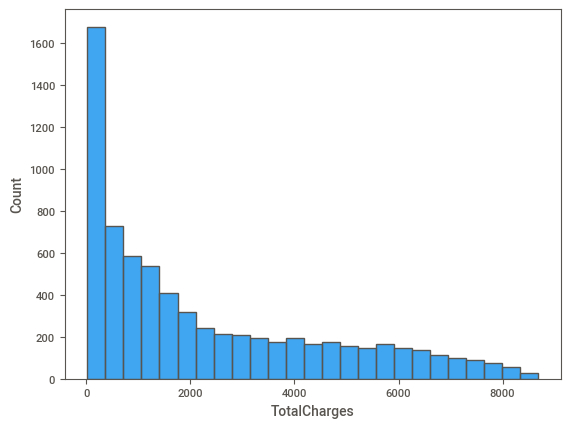

In [12]:
sns.histplot(df['TotalCharges'])

<Axes: ylabel='TotalCharges'>

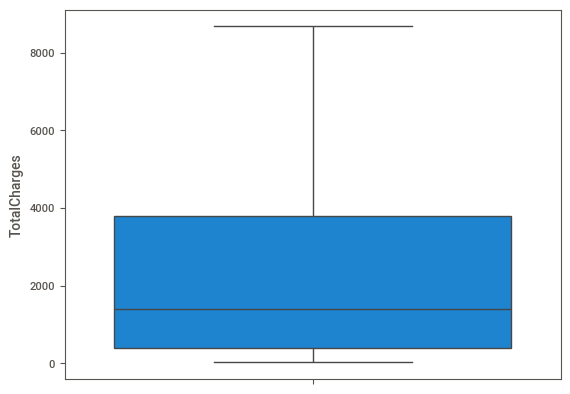

In [13]:
sns.boxplot(df['TotalCharges'])

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

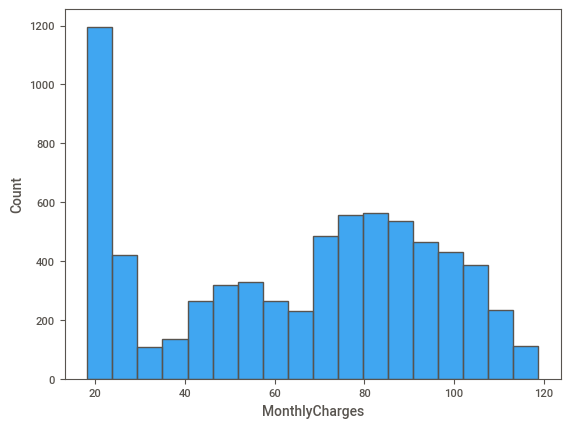

In [18]:
sns.histplot(df['MonthlyCharges'])

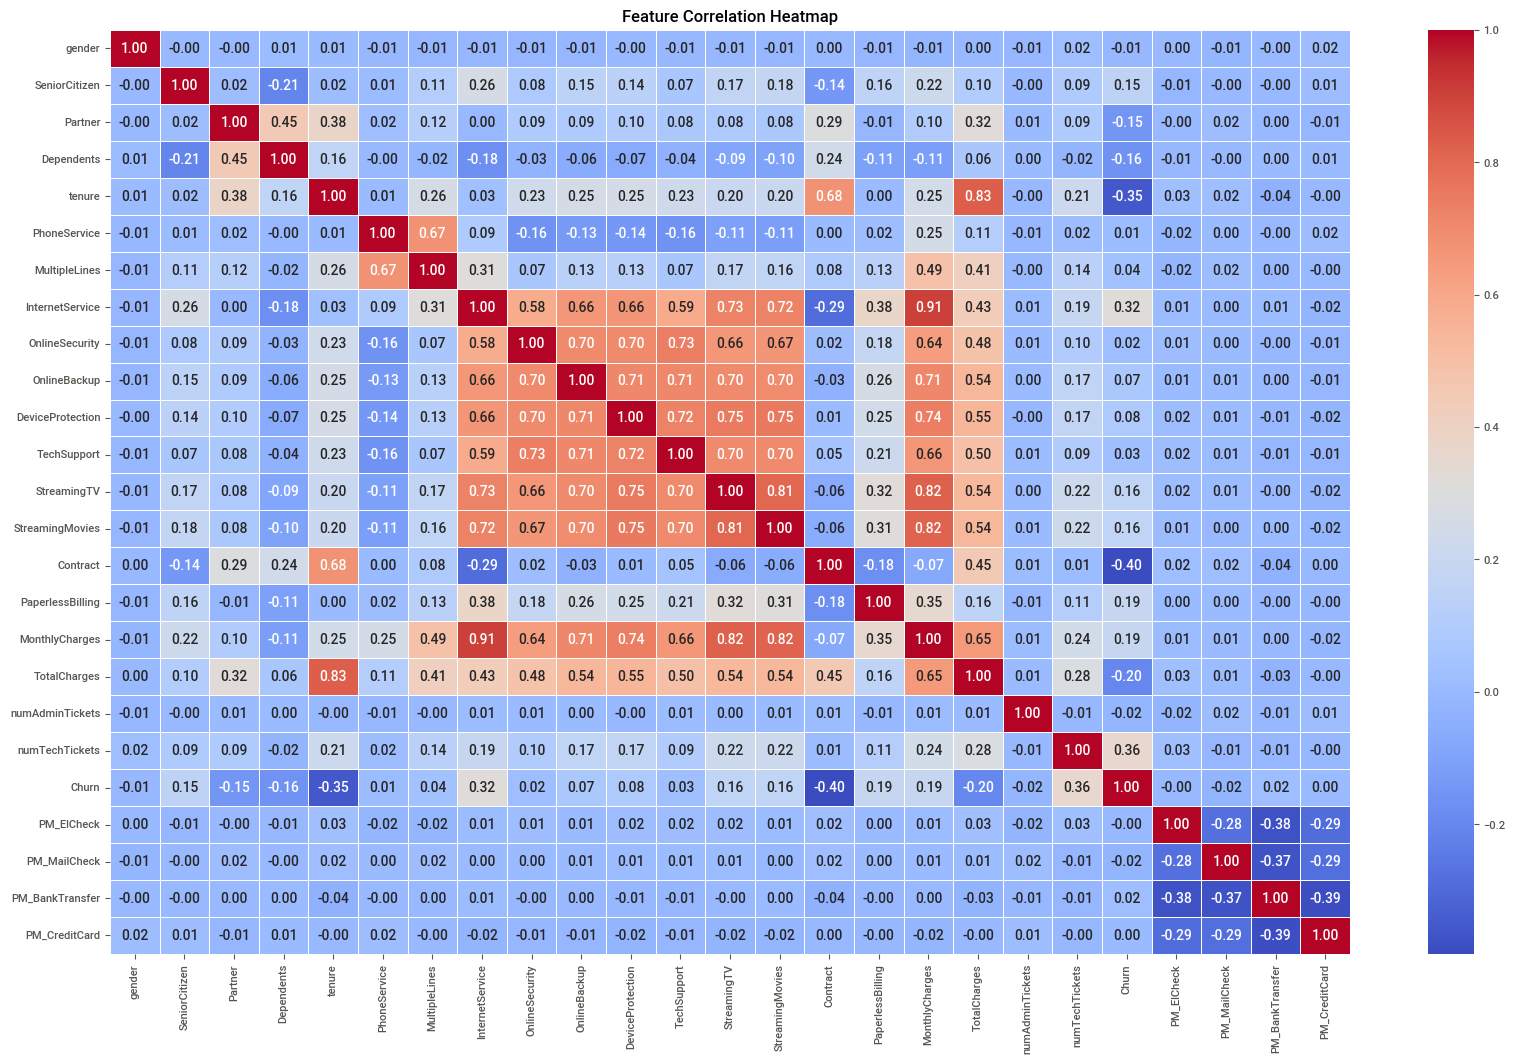

In [37]:
# check the correlation matrix again after the encoding

correlation_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

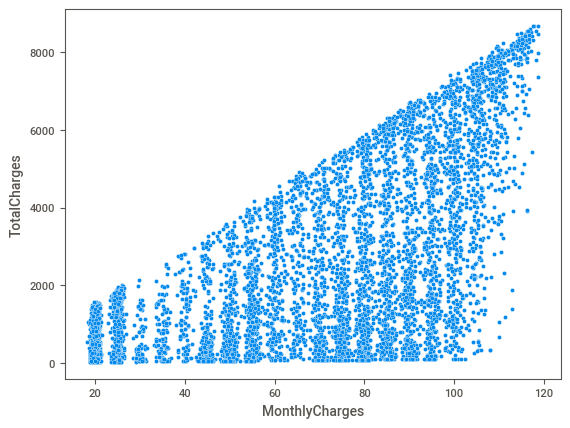

In [21]:
sns.scatterplot(df, x='MonthlyCharges',y='TotalCharges')

<Axes: xlabel='tenure', ylabel='TotalCharges'>

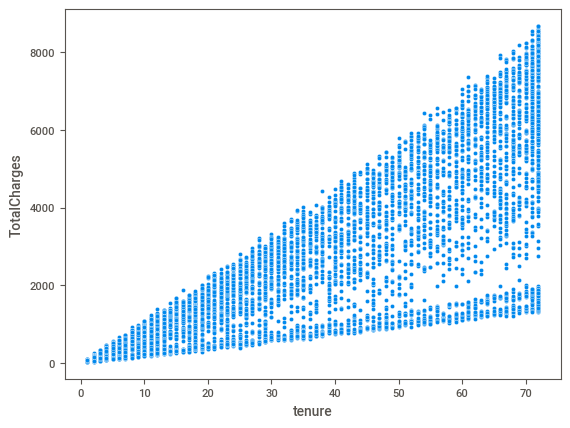

In [22]:
sns.scatterplot(df, x='tenure', y='TotalCharges')

There are is a correlated pair of variables - InternetService/MonthlyCharges - and a few less correlated pairs: StreamingTV/MonthlyCharges, StreamingMovies/MonthlyCharges, Contract/Tenure, StreamingTV/StreamingMovies. All of them make sense to keep for the further feature importance testing. 
The Contract/Tenure pair looks suspicious and a candidate on a removal of one of them, but it will be clear on the feature importance test

In [23]:
df[['tenure','MonthlyCharges','TotalCharges']].head(20)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.50
6,22,89.10,1949.40
7,10,29.75,301.90
8,28,104.80,3046.05
9,62,56.15,3487.95


# Model fitting

In [48]:
X=df.copy()
X.drop('TotalCharges',axis=1,inplace=True)
print(X.shape)
y=X.pop('Churn')
print(X.shape)
print(y.shape)

(7021, 24)
(7021, 23)
(7021,)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [50]:
print(X_train.shape)
print(X_test.shape)


(5616, 23)
(1405, 23)


In [51]:
model=RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)  
 
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy:.5f}")  

Accuracy: 0.85694


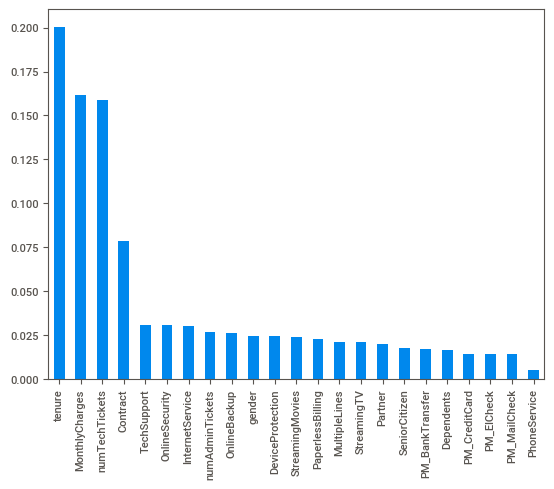

In [52]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)  
feature_importances.sort_values(ascending=False).plot(kind="bar")  
plt.show()  

In [53]:
from sklearn.metrics import mean_absolute_error

def get_mae(n_est, X_train, X_test, y_train, y_test):
    model=RandomForestClassifier(n_estimators=n_est, random_state=1)
    model.fit(X_train,y_train)
 #   model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
 #   model.fit(X_train,y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)


In [54]:
nodes_range=np.arange(10,201,5)

mae_scores = {n_est: get_mae(n_est, X_train, X_test, y_train, y_test) for n_est in nodes_range}
#mae_scores


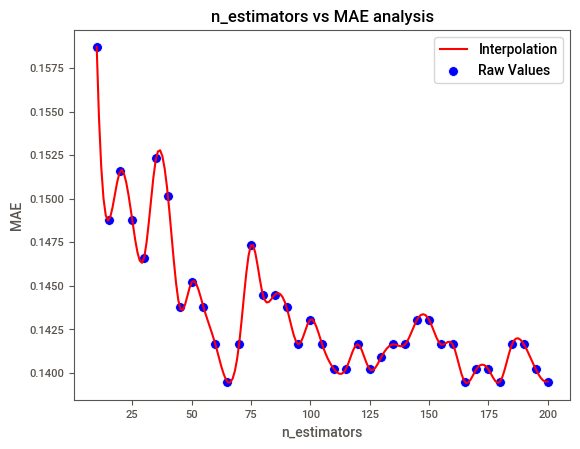

NameError: name 'mae_res' is not defined

In [55]:
from scipy.interpolate import make_interp_spline
xval=np.array(nodes_range)
yval=np.array(list(mae_scores.values()))

x_smooth = np.linspace(xval.min(), xval.max(), 200)  # Больше точек для плавности
spl = make_interp_spline(xval, yval, k=3)  # k=3 делает кубический сплайн
y_smooth = spl(x_smooth)

sns.lineplot(x=x_smooth, y=y_smooth, label="Interpolation", color='red')
sns.scatterplot(x=xval, y=yval, color='blue', s=50, label="Raw Values")  # Показываем исходные точки

plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('n_estimators vs MAE analysis')
plt.legend()
plt.show()

min_index = np.argmin(mae_scores)
#print(f"Minimal MAE: {mae_res[min_index]:.3f} achieved with n_estimators={nodes_range[min_index]}")
print(f"Minimal MAE: {min(mae_scores.values()):.3f} is achieved with n_estimators={min(mae_scores,key=mae_scores.get)}")


In [ ]:
# let's try with 90

model=RandomForestClassifier(n_estimators=90, random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy:.5f}")  

In [ ]:
# let's do the same without TotalCharges
X=df.copy()
X.drop('TotalCharges',axis=1,inplace=True)
y=X.pop('Churn')

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

model=RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)  
 
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy:.5f}")

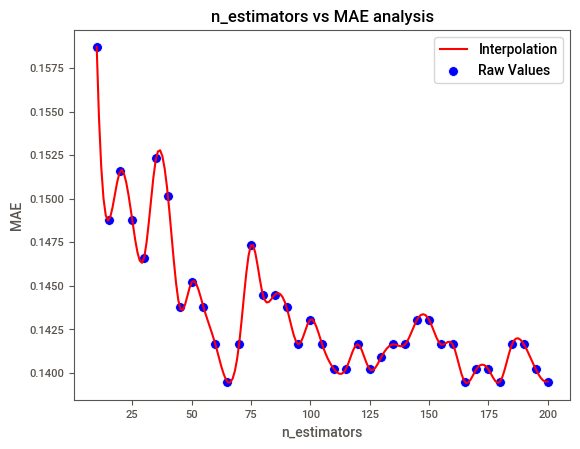

NameError: name 'mae_res' is not defined

In [56]:
nodes_range=np.arange(10,201,5)

mae_scores = {n_est: get_mae(n_est, X_train, X_test, y_train, y_test) for n_est in nodes_range}
#mae_scores
xval=np.array(nodes_range)
yval=np.array(list(mae_scores.values()))

x_smooth = np.linspace(xval.min(), xval.max(), 200)  # Больше точек для плавности
spl = make_interp_spline(xval, yval, k=3)  # k=3 делает кубический сплайн
y_smooth = spl(x_smooth)

sns.lineplot(x=x_smooth, y=y_smooth, label="Interpolation", color='red')
sns.scatterplot(x=xval, y=yval, color='blue', s=50, label="Raw Values")  # Показываем исходные точки

plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('n_estimators vs MAE analysis')
plt.legend()
plt.show()

min_index = np.argmin(mae_res)
#print(f"Minimal MAE: {mae_res[min_index]:.3f} achieved with n_estimators={nodes_range[min_index]}")
print(f"Minimal MAE: {min(mae_scores.values()):.3f} is achieved with n_estimators={min(mae_scores,key=mae_scores.get)}")

In [57]:
model=RandomForestClassifier(n_estimators=60, random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy:.5f}")  

Accuracy: 0.85836


### PCA

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
col=X.columns
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)


In [59]:
X_scaled

array([[-1.00930119, -0.44027785,  1.03523068, ..., -0.52565521,
         1.40489855, -0.54349559],
       [ 0.99078452, -0.44027785, -0.96596828, ..., -0.52565521,
        -0.71179517,  1.83994134],
       [ 0.99078452, -0.44027785, -0.96596828, ..., -0.52565521,
        -0.71179517,  1.83994134],
       ...,
       [-1.00930119,  2.27129301, -0.96596828, ..., -0.52565521,
         1.40489855, -0.54349559],
       [-1.00930119, -0.44027785, -0.96596828, ..., -0.52565521,
        -0.71179517,  1.83994134],
       [ 0.99078452,  2.27129301,  1.03523068, ..., -0.52565521,
        -0.71179517, -0.54349559]])

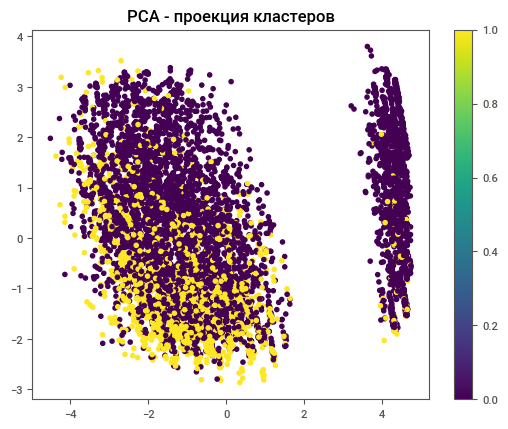

[0.27739377 0.09895461 0.08334653 0.06238729 0.05615584 0.05580766
 0.04733912 0.04504743 0.0437281  0.04297112 0.03825406 0.03465915
 0.02069885 0.01743509 0.01408282 0.01180581 0.01131224 0.01105024
 0.00957082 0.00895552 0.00835808 0.00068587]


In [61]:
pca = PCA(n_components=22)  # Можно выбрать больше компонент для более точной визуализации
X_pca = pca.fit_transform(X_scaled)

# Визуализируем
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('PCA - проекция кластеров')
plt.show()
print(pca.explained_variance_ratio_)

In [62]:
loadings=pd.DataFrame(pca.components_, columns=X.columns)
loadings

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,numAdminTickets,numTechTickets,PM_ElCheck,PM_MailCheck,PM_BankTransfer,PM_CreditCard
0,0.005073,-0.091846,-0.046346,0.044444,-0.114026,0.012437,-0.111901,-0.336959,-0.315281,-0.333350,...,-0.352056,0.019635,-0.153168,-0.366949,-0.002450,-0.102083,-0.007497,-0.004229,0.001730,0.009596
1,0.007450,-0.140157,0.437287,0.377521,0.516226,0.069350,0.152833,-0.162505,0.034548,0.010475,...,-0.028424,0.536476,-0.147115,-0.002694,0.005981,0.086340,0.021870,0.033356,-0.049416,0.001335
2,0.011081,-0.148950,0.005942,0.094392,-0.012664,-0.635265,-0.601879,-0.142339,0.181745,0.110562,...,0.061814,0.069471,-0.120620,-0.217396,0.009095,-0.111821,0.041827,-0.011584,-0.009572,-0.019093
3,-0.011007,-0.042035,0.073943,0.089758,-0.018237,0.006144,0.009423,0.006776,0.008073,0.007443,...,0.007308,-0.012894,-0.023581,0.006746,-0.015689,-0.027529,-0.308375,-0.280817,0.827283,-0.351808
4,0.047828,0.016450,0.025546,0.053227,-0.009071,-0.008539,-0.014483,-0.008019,0.022485,0.019434,...,0.005937,-0.005678,-0.012104,-0.003879,0.069685,-0.043338,-0.596679,-0.208316,0.024754,0.764964
5,-0.066586,-0.026739,0.012322,0.016102,-0.033410,-0.003380,-0.001417,0.002149,0.012487,0.009100,...,-0.001389,-0.013142,-0.006307,-0.003503,0.079315,-0.096043,-0.541320,0.797928,-0.030465,-0.215203
6,0.162964,0.560140,0.002999,-0.322720,0.276913,-0.252850,-0.106289,-0.063620,-0.132835,-0.039789,...,0.000065,0.130773,0.161956,-0.075719,-0.068722,0.536339,-0.106632,0.053409,0.068368,-0.024268
7,-0.196140,-0.107666,-0.488245,-0.547475,0.260544,0.065304,0.097041,-0.104913,0.090578,0.031137,...,-0.010200,0.374243,-0.316747,-0.000459,0.102992,-0.189706,-0.034558,-0.043765,0.065379,0.003418
8,-0.677949,0.200766,0.142061,0.054356,-0.004113,-0.066587,-0.038987,0.014766,-0.039319,-0.016306,...,-0.001988,-0.036068,0.120754,-0.012331,0.662550,0.042045,0.061708,-0.068889,0.002200,0.004301
9,0.665322,-0.077664,-0.053302,-0.009755,-0.017011,0.029773,0.020193,0.013137,0.004299,-0.003069,...,0.004896,-0.004066,-0.077826,0.016930,0.729540,0.031321,0.049714,0.000496,0.013425,-0.064624


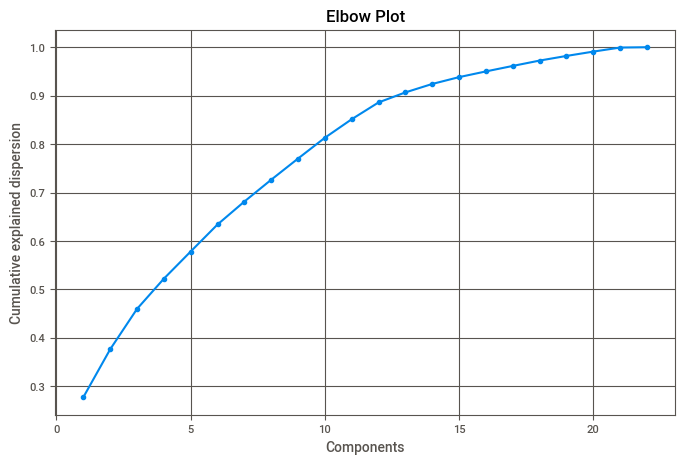

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Components')
plt.ylabel('Cumulative explained dispersion')
plt.title('Elbow Plot')
plt.grid(True)
plt.show()

Text(0.5, 0, 'Component')

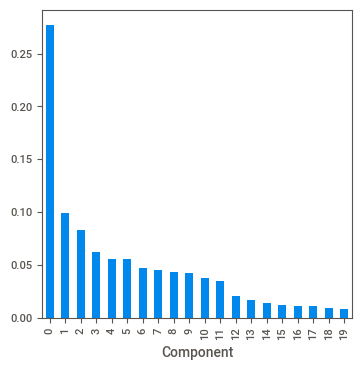

In [64]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)
ax = explained_variance.head(20).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

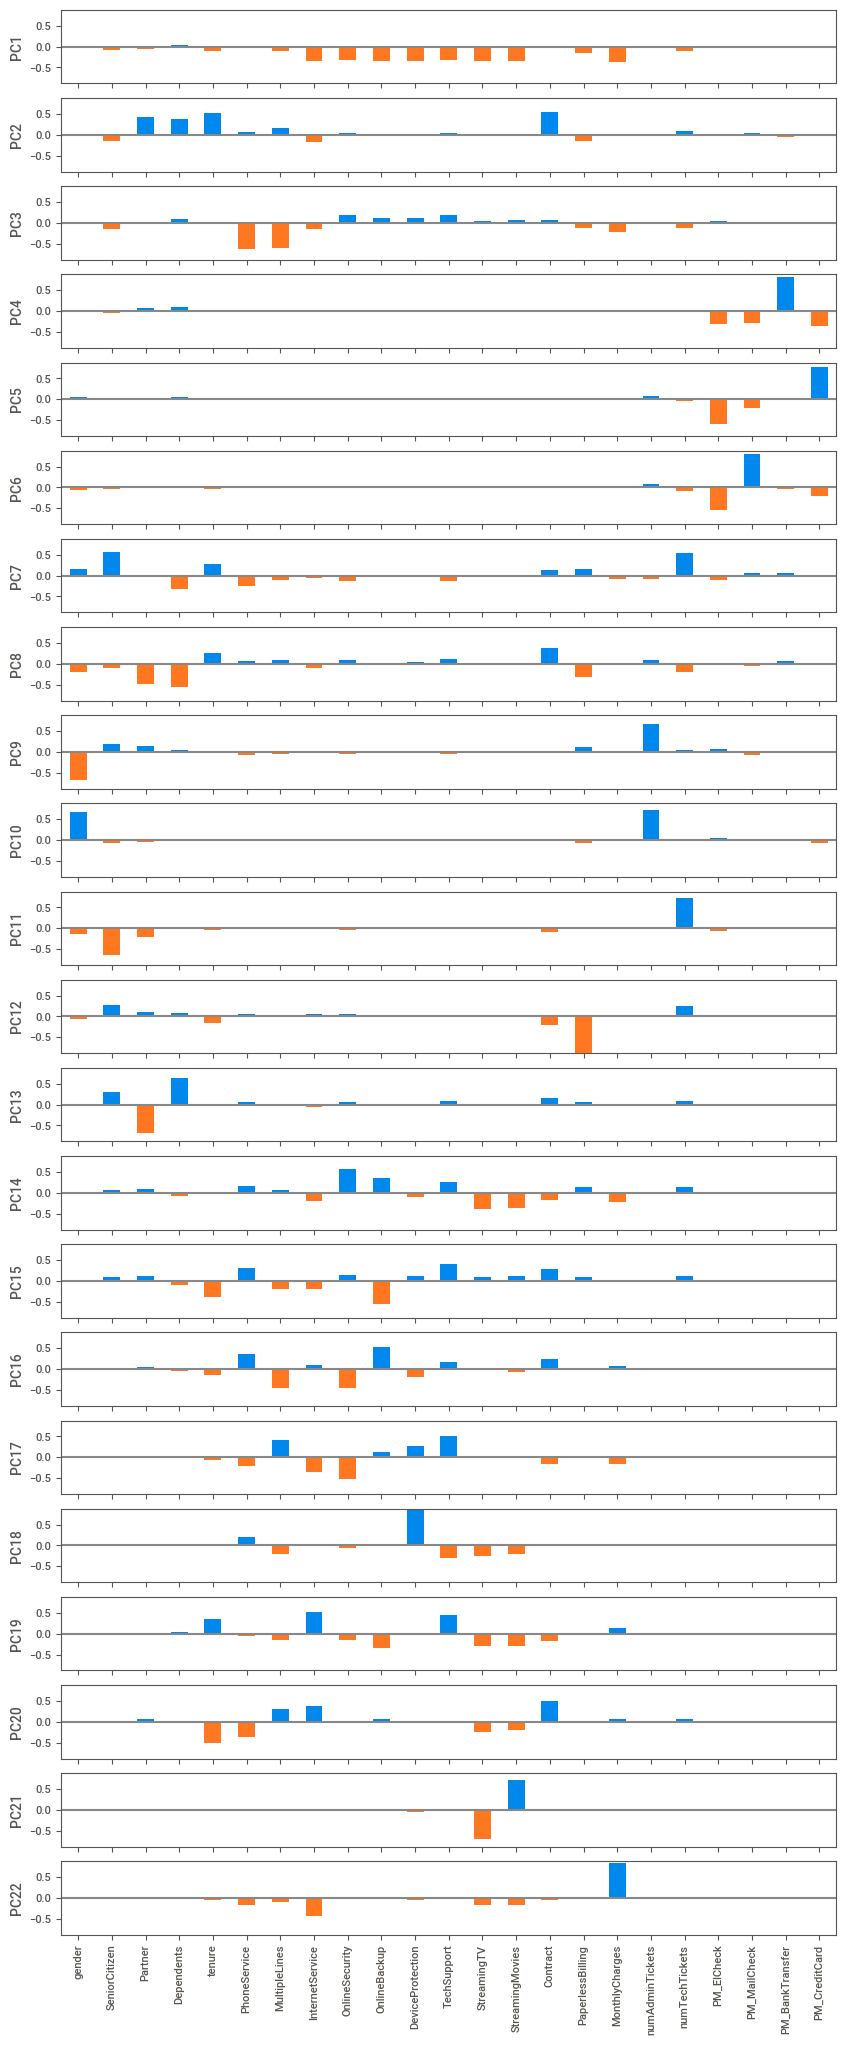

In [65]:
#loadings = pd.DataFrame(pca.components_[0:10, :], columns=X_scaled.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:22, :])))

f, axes = plt.subplots(22, 1, figsize=(10, 25), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

In [66]:
# It seems that the payment method doesn't impact the performance at all - drop it completely
df=pd.read_csv("telecom_churn.csv")
df_raw=df.copy()
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df=df.drop('customerID',axis=1)
df=df.drop('PaymentMethod',axis=1)
df.shape

(7032, 21)

In [67]:
encoder = LabelEncoder()
#default mapping No-0,Yes-1; Female-0,Male-1
df['gender']=encoder.fit_transform(df['gender'])
df['Partner']=encoder.fit_transform(df['Partner'])
df['Dependents']=encoder.fit_transform(df['Dependents'])
df['PhoneService']=encoder.fit_transform(df['PhoneService'])
df['PaperlessBilling']=encoder.fit_transform(df['PaperlessBilling'])
#df['PaymentMethod']=encoder.fit_transform(df['PaymentMethod'])
df['Churn']=encoder.fit_transform(df['Churn'])


# explicit mapping
df['Contract'] = df['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
df['InternetService'] = df['InternetService'].map({'No':0, 'DSL':1, 'Fiber optic':2})

df['StreamingMovies'] = df['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':-1})
df['StreamingTV'] = df['StreamingTV'].map({'No':0,'Yes':1,'No internet service':-1})
df['TechSupport'] = df['TechSupport'].map({'No':0,'Yes':1,'No internet service':-1})
df['DeviceProtection'] = df['DeviceProtection'].map({'No':0,'Yes':1,'No internet service':-1})
df['OnlineBackup'] = df['OnlineBackup'].map({'No':0,'Yes':1,'No internet service':-1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':-1})
df['MultipleLines'] = df['MultipleLines'].map({'No':0,'Yes':1,'No phone service':-1})



In [68]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,0,0,1,0,1,0,-1,1,0,1,...,0,0,0,0,1,29.85,29.85,0,0,0
1,1,0,0,0,34,1,0,1,1,0,...,0,0,0,1,0,56.95,1889.50,0,0,0
2,1,0,0,0,2,1,0,1,1,1,...,0,0,0,0,1,53.85,108.15,0,0,1
3,1,0,0,0,45,0,-1,1,1,0,...,1,0,0,1,0,42.30,1840.75,0,3,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,0,0,1,70.70,151.65,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,1,1,1,1,1,84.80,1990.50,0,0,0
7039,0,0,1,1,72,1,1,2,0,1,...,0,1,1,1,1,103.20,7362.90,0,5,0
7040,0,0,1,1,11,0,-1,1,1,0,...,0,0,0,0,1,29.60,346.45,0,0,0
7041,1,1,1,0,4,1,1,2,0,0,...,0,0,0,0,1,74.40,306.60,0,0,1


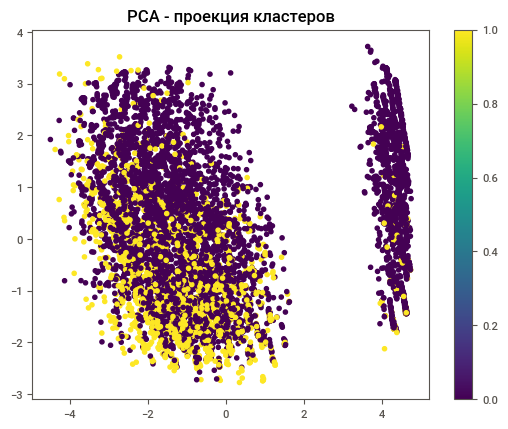

[0.33569071 0.11956535 0.10088958 0.05749864 0.05471494 0.05304644
 0.05213205 0.04647128 0.04198931 0.0250596  0.02112196 0.01705959
 0.01429262 0.01370847 0.01336627 0.01159554 0.01084587 0.01012105
 0.00083072]


In [70]:
#PCA
X=df.copy()
X.drop('TotalCharges',axis=1,inplace=True)
y=X.pop('Churn')

col=X.columns
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

pca = PCA(n_components=19)  # Можно выбрать больше компонент для более точной визуализации
X_pca = pca.fit_transform(X_scaled)

# Визуализируем
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('PCA - проекция кластеров')
plt.show()
print(pca.explained_variance_ratio_)


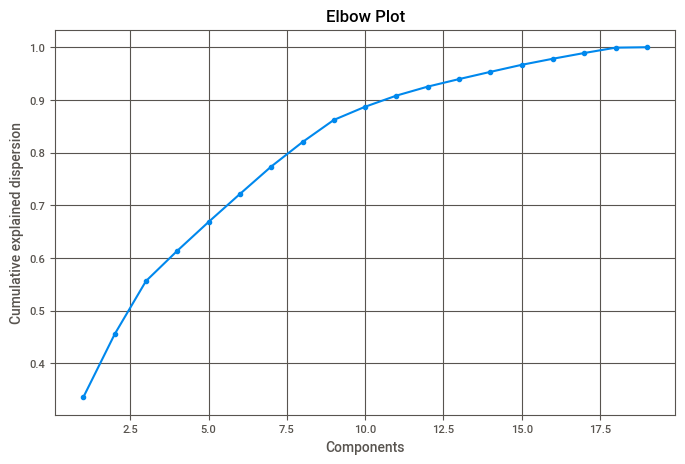

In [71]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Components')
plt.ylabel('Cumulative explained dispersion')
plt.title('Elbow Plot')
plt.grid(True)
plt.show()

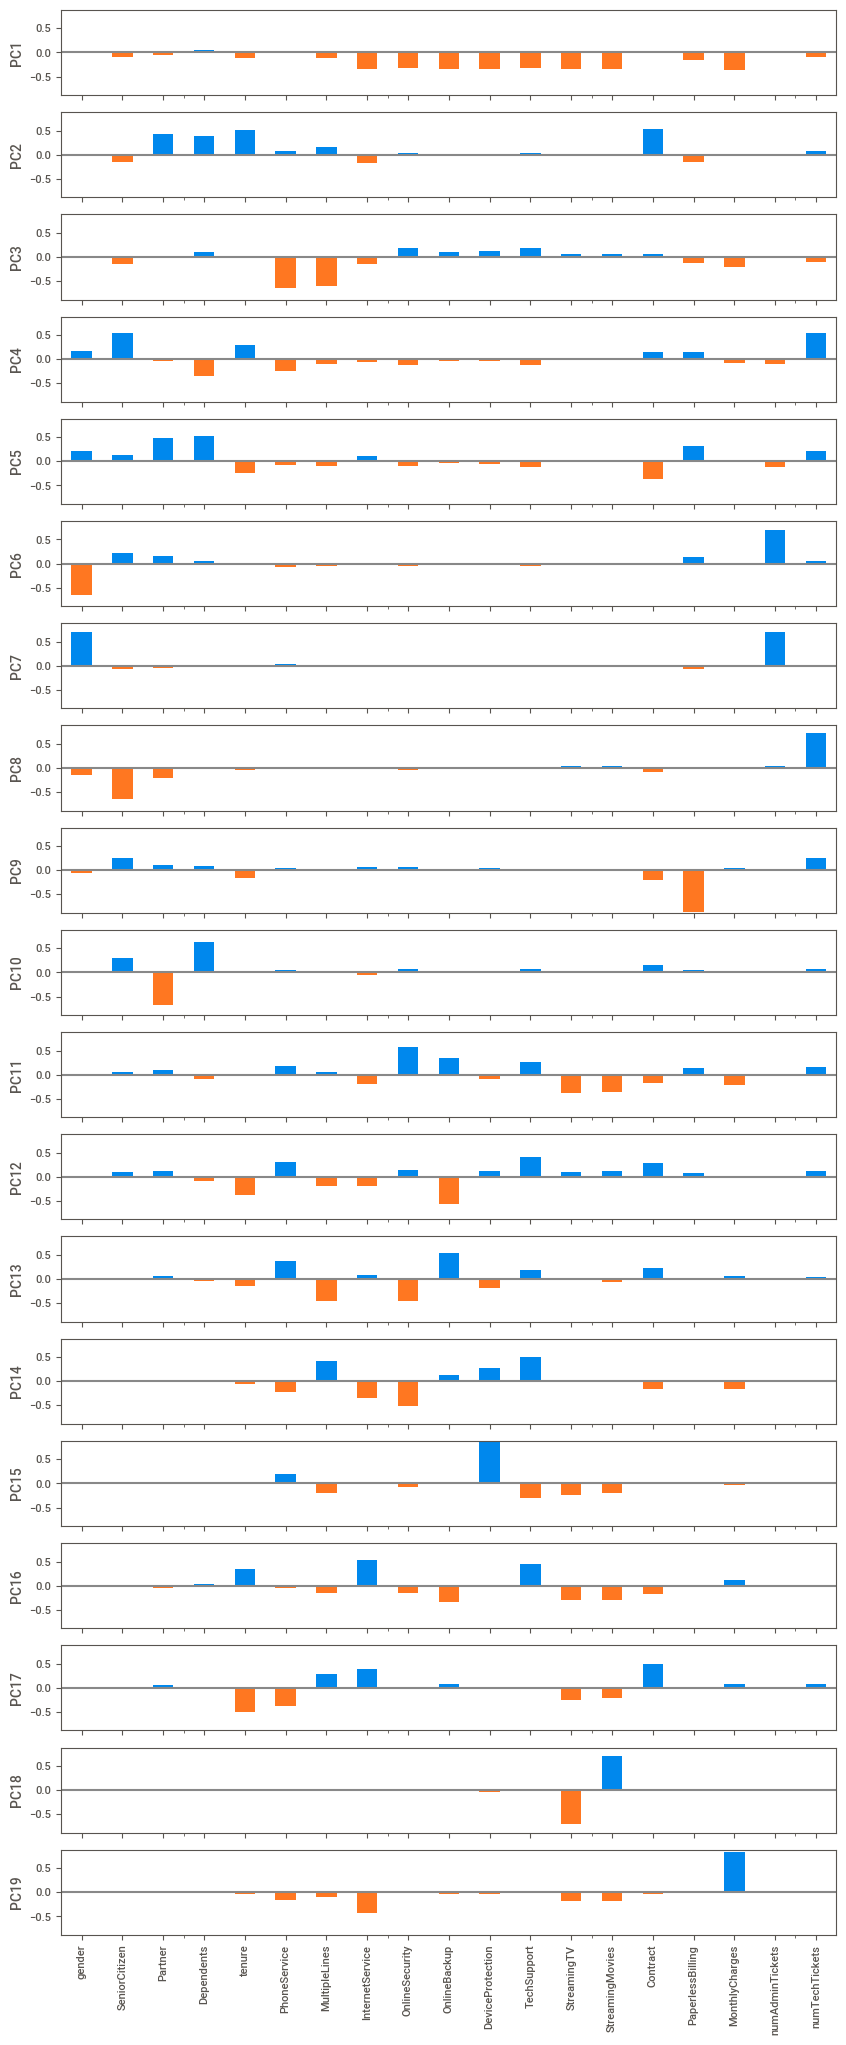

In [73]:
loadings=pd.DataFrame(pca.components_, columns=X.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:19, :])))

f, axes = plt.subplots(19, 1, figsize=(10, 25), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

In [74]:
#RandomForest for all Components
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model=RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)  
 
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy:.5f}")  

Accuracy: 0.85146


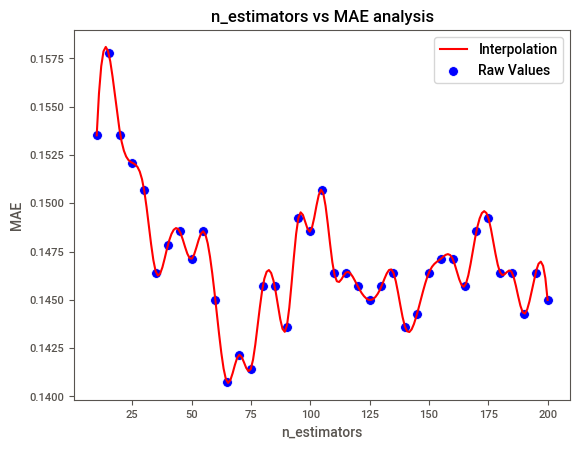

Minimal MAE: 0.141 is achieved with n_estimators=65


In [75]:
nodes_range=np.arange(10,201,5)

mae_scores = {n_est: get_mae(n_est, X_train, X_test, y_train, y_test) for n_est in nodes_range}

xval=np.array(nodes_range)
yval=np.array(list(mae_scores.values()))

x_smooth = np.linspace(xval.min(), xval.max(), 200)  # Больше точек для плавности
spl = make_interp_spline(xval, yval, k=3)  # k=3 делает кубический сплайн
y_smooth = spl(x_smooth)

sns.lineplot(x=x_smooth, y=y_smooth, label="Interpolation", color='red')
sns.scatterplot(x=xval, y=yval, color='blue', s=50, label="Raw Values")  # Показываем исходные точки

plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('n_estimators vs MAE analysis')
plt.legend()
plt.show()

min_index = np.argmin(mae_scores)
#print(f"Minimal MAE: {mae_res[min_index]:.3f} achieved with n_estimators={nodes_range[min_index]}")
print(f"Minimal MAE: {min(mae_scores.values()):.3f} is achieved with n_estimators={min(mae_scores,key=mae_scores.get)}")


In [76]:
#RandomForest for all Components with n_estimators=65
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model=RandomForestClassifier(n_estimators=65, random_state=1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)  
 
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy:.5f}")  

Accuracy: 0.85928


In [ ]:
# keep with confusion matrix and then run the same for PCA=10 only

In [86]:
pred_y=y_pred==1
true_y=y_test==1
true_pos = np.sum(true_y & pred_y)
true_neg = np.sum(~true_y & ~pred_y)
false_pos = np.sum(~true_y & pred_y)
false_neg = np.sum(true_y & ~pred_y)

conf_mat = pd.DataFrame([[true_pos, false_neg],
                         [false_pos, true_neg]],
                       index=['Y = Churned', 'Y = Retained'],
                       columns=['Y_pred = Churned', 'Y_pred = Retained'])
conf_mat


,Y_pred = Churned,Y_pred = Retained
Y = Churned,251,115
Y = Retained,83,958


In [97]:
print(f"Recall: {true_pos/(true_pos+false_neg):.3f}")
print(f"Precision: {true_pos/(true_pos+false_pos):.3f}")
print(f"Accuracy: {(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg):.3f}")


Recall: 0.686
Precision: 0.751
Accuracy: 0.859


In [133]:
pca = PCA(n_components=15)  # Можно выбрать больше компонент для более точной визуализации
X_pca = pca.fit_transform(X_scaled)
df_pca=pd.DataFrame(X_pca)

In [134]:
df_pca.shape

(7032, 15)

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=1)
model=RandomForestClassifier(n_estimators=75, random_state=1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)  
pred_y=y_pred==1
true_y=y_test==1
true_pos = np.sum(true_y & pred_y)
true_neg = np.sum(~true_y & ~pred_y)
false_pos = np.sum(~true_y & pred_y)
false_neg = np.sum(true_y & ~pred_y)

conf_mat = pd.DataFrame([[true_pos, false_neg],
                         [false_pos, true_neg]],
                       index=['Y = Churned', 'Y = Retained'],
                       columns=['Y_pred = Churned', 'Y_pred = Retained'])
conf_mat

,Y_pred = Churned,Y_pred = Retained
Y = Churned,228,138
Y = Retained,90,951


In [151]:
print(f"Recall: {true_pos/(true_pos+false_neg):.3f}")
print(f"Precision: {true_pos/(true_pos+false_pos):.3f}")
print(f"Accuracy: {(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg):.3f}")

Recall: 0.623
Precision: 0.717
Accuracy: 0.838


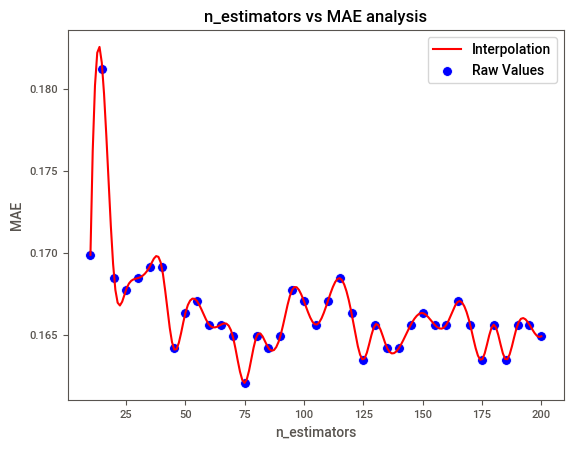

Minimal MAE: 0.162 is achieved with n_estimators=75


In [137]:
nodes_range=np.arange(10,201,5)

mae_scores = {n_est: get_mae(n_est, X_train, X_test, y_train, y_test) for n_est in nodes_range}

xval=np.array(nodes_range)
yval=np.array(list(mae_scores.values()))

x_smooth = np.linspace(xval.min(), xval.max(), 200)  # Больше точек для плавности
spl = make_interp_spline(xval, yval, k=3)  # k=3 делает кубический сплайн
y_smooth = spl(x_smooth)

sns.lineplot(x=x_smooth, y=y_smooth, label="Interpolation", color='red')
sns.scatterplot(x=xval, y=yval, color='blue', s=50, label="Raw Values")  # Показываем исходные точки

plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('n_estimators vs MAE analysis')
plt.legend()
plt.show()

min_index = np.argmin(mae_scores)
#print(f"Minimal MAE: {mae_res[min_index]:.3f} achieved with n_estimators={nodes_range[min_index]}")
print(f"Minimal MAE: {min(mae_scores.values()):.3f} is achieved with n_estimators={min(mae_scores,key=mae_scores.get)}")